In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
db = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
db.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [3]:
db.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
db.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [5]:
def preprocess(db):
    # Split the data in Cabin into three more columns 
    new_columns = ['Cabin_Deck','Cabin_Num','Cabin_Side']
    db[new_columns] = db['Cabin'].str.split('/',expand=True)
    # Split the data in Name into two more columns
    new_columns = ['FirstName','LastName']
    db[new_columns] = db['Name'].str.split(' ',expand=True)
    # Split the data in PassengerId into two more columns
    new_columns = ['Group_Id','Pass_Id']
    db[new_columns] = db['PassengerId'].str.split('_',expand=True)
    
    # Fill missing values
    # Numerical columns
    columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall','Spa','VRDeck']
    for column in columns:
        db[column].fillna(db[column].mean(), inplace=True)
    # Categorical columns
    columns = ['HomePlanet','CryoSleep','Destination','VIP']
    for column in columns:
        db[column].fillna(db[column].mode()[0], inplace=True)


    # Turn categorical columns into numerical
    columns = ['HomePlanet','CryoSleep','Destination','VIP','Cabin_Deck','Cabin_Num','Cabin_Side','FirstName','LastName','Group_Id','Pass_Id']
    for column in columns:
        db[column] = pd.Categorical(db[column])
        db[column] = db[column].cat.codes
    
    # Drop columns that are not useful
    db.drop(['Name','Cabin','FirstName','LastName'], axis=1, inplace=True)
    
    return db.drop(['PassengerId'], axis=1), db['PassengerId']

In [6]:
X = db.drop('Transported', axis=1)
y = db['Transported']
    
X,_ = preprocess(X)
X.head()

C:\Users\abdfa\AppData\Local\Temp\ipykernel_34368\3297772935.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.

The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





  db[column].fillna(db[column].mean(), inplace=True)

C:\Users\abdfa\AppData\Local\Temp\ipykernel_34368\3297772935.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.

The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_Deck,Cabin_Num,Cabin_Side,Group_Id,Pass_Id
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,5,0,1,1,0
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,1,2,0
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,2,1
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,5,1,1,3,0


In [7]:
# Split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True)

## Decision Tree Classifier

In [8]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=3)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [9]:
# Check the accuracy of the model
dt_acc = dt_model.score(X_test, y_test)
print('Decision Tree accuracy: ', dt_acc)

Decision Tree accuracy:  0.718558282208589


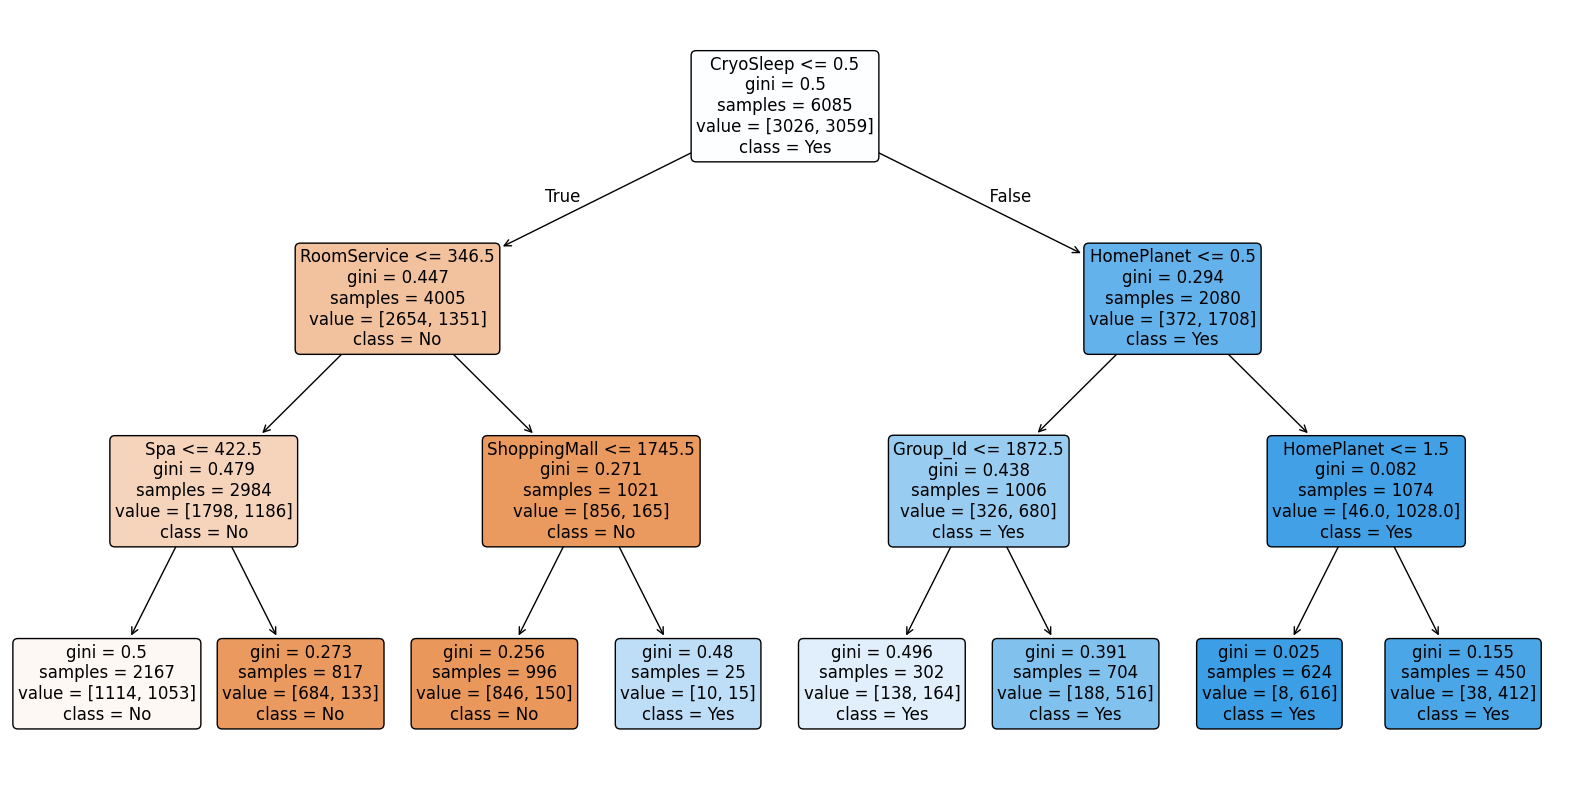

In [10]:
from sklearn import tree
# Plot the decision tree
plt.figure(figsize=(20, 10))  # Set the figure size for better readability
tree.plot_tree(dt_model, 
               filled=True,
                feature_names=X.columns,
                class_names=['No', 'Yes'], 
               rounded=True,
               fontsize=12)
plt.show()

## Random Forest Classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=300)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [12]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

fi = rf_feat_importance(rf_model, X)
fi[:10]
    

,cols,imp
13,Group_Id,0.110897
11,Cabin_Num,0.109461
8,Spa,0.103717
3,Age,0.097445
1,CryoSleep,0.095175
5,RoomService,0.092120
9,VRDeck,0.089988
6,FoodCourt,0.077413
7,ShoppingMall,0.065870
10,Cabin_Deck,0.050668


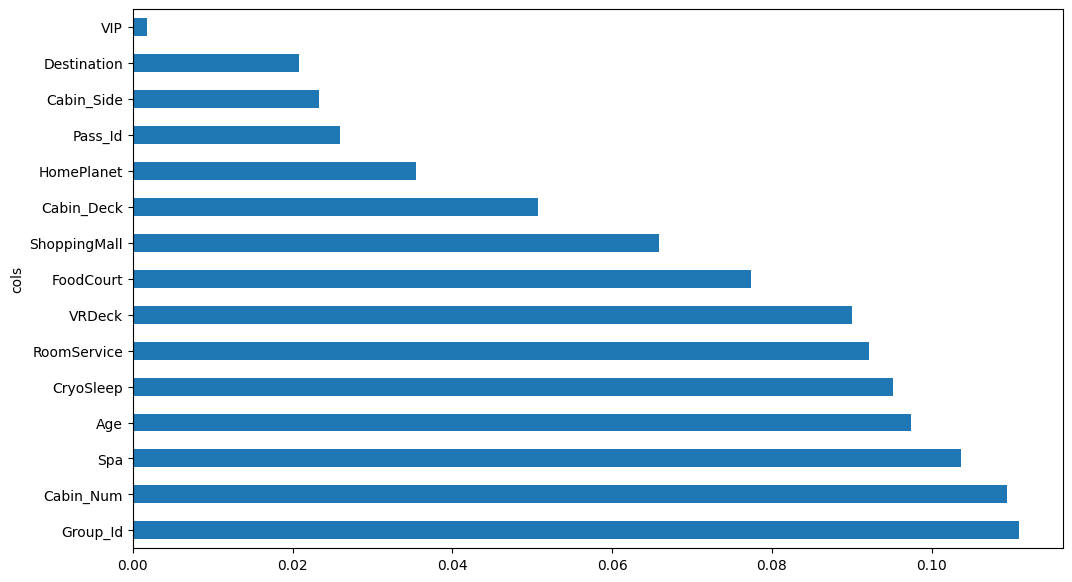

In [13]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);

In [14]:
# Check the accuracy of the model
rf_acc = rf_model.score(X_test, y_test)
print('Random Forest accuracy: ', rf_acc)

Random Forest accuracy:  0.799079754601227


## Gradient Boost Classifier

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(50, 400),  # Random number of boosting stages
    'learning_rate': uniform(0.01, 0.2),  # Random learning rate
    'max_depth': randint(3, 6),  # Random maximum depth
    'subsample': uniform(0.8, 0.2),  # Random subsample
    'max_features': ['sqrt', 'log2', None]  # Random selection of features
}

# Create the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=gb_clf, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

print("Best parameters found (Randomized Search):", best_params_random)
print("Best cross-validation score (Randomized Search): {:.2f}".format(best_score_random))

# Train the model with the best parameters from Randomized Search
best_gb_clf_random = random_search.best_estimator_
best_gb_clf_random.fit(X_train, y_train)

Best parameters found (Randomized Search): {'learning_rate': 0.14039225190052013, 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 117, 'subsample': 0.8474498174993601}

Best cross-validation score (Randomized Search): 0.81


GradientBoostingClassifier(learning_rate=0.14039225190052013,
                           max_features='sqrt', n_estimators=117,
                           random_state=42, subsample=0.8474498174993601)

In [16]:
gb_acc = best_gb_clf_random.score(X_test, y_test)
print('Gradient Boosting accuracy: ', gb_acc)

Gradient Boosting accuracy:  0.785659509202454


## XGBoost Classifier

In [17]:
import xgboost as xgb

# Create the DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [18]:
# Define the parameters
params = {
    'objective': 'binary:logistic',
    'tree_method': 'gpu_hist',  # Use GPU acceleration for faster computation
    'eval_metric': 'auc',  # Use AUC for a better understanding of model performance
}

In [19]:
# Create the model CV
cv_results = xgb.cv(params, dtrain, 
                    num_boost_round=1000, 
                    nfold=5,
                    metrics= ['error','auc'],
                    verbose_eval=10  # Prints the evaluation metric results at every specified boosting round
                    )

best_num_boost_rounds = cv_results['test-auc-mean'].idxmax()

[0]	train-error:0.19733+0.00576	train-auc:0.88406+0.00437	test-error:0.23221+0.00969	test-auc:0.85487+0.00827


c:\Users\abdfa\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:52:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.



    E.g. tree_method = "hist", device = "cuda"



  warnings.warn(smsg, UserWarning)

c:\Users\abdfa\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:52:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.



    E.g. tree_method = "hist", device = "cuda"



  warnings.warn(smsg, UserWarning)


[10]	train-error:0.14511+0.00536	train-auc:0.93909+0.00194	test-error:0.20362+0.01555	test-auc:0.89064+0.01006

[20]	train-error:0.11964+0.00231	train-auc:0.95585+0.00068	test-error:0.19606+0.01449	test-auc:0.89438+0.00937

[30]	train-error:0.10189+0.00468	train-auc:0.96666+0.00171	test-error:0.19770+0.01177	test-auc:0.89456+0.00983

[40]	train-error:0.08611+0.00276	train-auc:0.97501+0.00182	test-error:0.19556+0.01249	test-auc:0.89446+0.00971

[50]	train-error:0.07387+0.00411	train-auc:0.98149+0.00187	test-error:0.19885+0.01318	test-auc:0.89313+0.01087

[60]	train-error:0.06212+0.00311	train-auc:0.98631+0.00142	test-error:0.19803+0.01228	test-auc:0.89163+0.01083

[70]	train-error:0.05407+0.00387	train-auc:0.98935+0.00085	test-error:0.20066+0.01390	test-auc:0.89099+0.01056

[80]	train-error:0.04577+0.00318	train-auc:0.99212+0.00065	test-error:0.20016+0.01301	test-auc:0.89060+0.01005

[90]	train-error:0.03903+0.00308	train-auc:0.99410+0.00070	test-error:0.20115+0.01487	test-auc:0.88960+0

In [20]:
best_num_boost_rounds

36

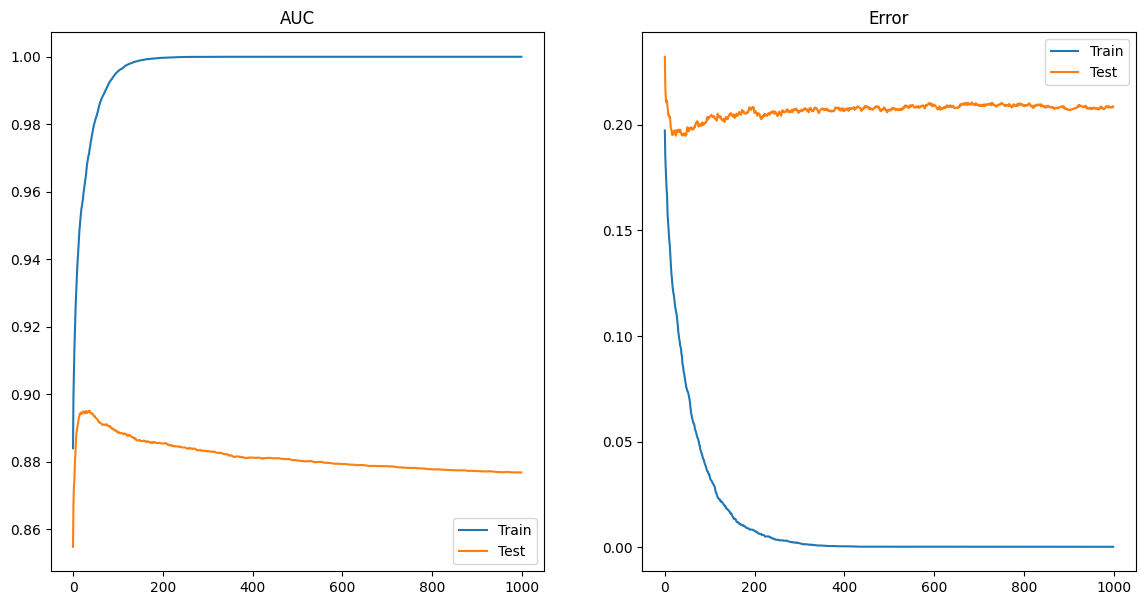

In [21]:
# plot the error and AUC

fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Plot the AUC
ax[0].plot(cv_results['train-auc-mean'], label='Train')
ax[0].plot(cv_results['test-auc-mean'], label='Test')
ax[0].set_title('AUC')
ax[0].legend()

# Plot the error
ax[1].plot(cv_results['train-error-mean'], label='Train')
ax[1].plot(cv_results['test-error-mean'], label='Test')
ax[1].set_title('Error')
ax[1].legend()

plt.show()


In [22]:
xgb_model = xgb.train(params, dtrain, num_boost_round=best_num_boost_rounds)

c:\Users\abdfa\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:52:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.



    E.g. tree_method = "hist", device = "cuda"



  warnings.warn(smsg, UserWarning)


In [23]:
# accuracy
y_pred = xgb_model.predict(dtest)
y_pred = [1 if value >= 0.5 else 0 for value in y_pred]

from sklearn.metrics import accuracy_score

xgb_acc = accuracy_score(y_test, y_pred)
print('XGBoost accuracy: ', xgb_acc)

XGBoost accuracy:  0.7952453987730062


## Comparison of the above models

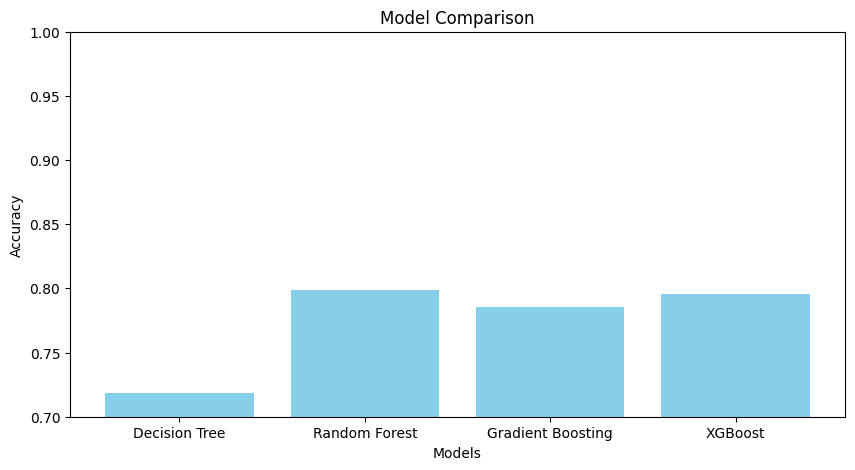

In [24]:
# Compare the accuracy of the models
models = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost']
accuracies = [dt_acc, rf_acc, gb_acc, xgb_acc]
actual_model = [dt_model, rf_model, best_gb_clf_random, xgb_model]
# Legend
plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0.7, 1)
plt.show()


In [25]:
# Best model
best_model = models[np.argmax(accuracies)]
best_accuracy = max(accuracies)
best_actual_model = actual_model[np.argmax(accuracies)]

print('The best model is', best_model, 'with an accuracy of', best_accuracy)

The best model is Random Forest with an accuracy of 0.799079754601227


## Submission

In [26]:
test_db = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
test_db,ids = preprocess(test_db)
dscore = xgb.DMatrix(test_db)


C:\Users\abdfa\AppData\Local\Temp\ipykernel_34368\3297772935.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.

The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





  db[column].fillna(db[column].mean(), inplace=True)

C:\Users\abdfa\AppData\Local\Temp\ipykernel_34368\3297772935.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.

The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [27]:
# predict the values
y_pred = []
if best_model == 'XGBoost':
    y_pred = best_actual_model.predict(dscore)
    y_pred =  (y_pred > 0.5).astype(bool)
    # plot y_pred
    plt.hist(y_pred, bins=20)
    plt.show()
else:
    y_pred = best_actual_model.predict(test_db)

In [28]:
# Make a submission dataframe
submission = pd.DataFrame({'PassengerId': ids, 'Transported': y_pred})
submission.to_csv('submission.csv', index=False)
submission.head()


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
